## **Loan Approval Prediction - Machine Learning**
##### **Project By : Anirudh Johare**

##### **Objective :** The goal is to predict whether an applicant is approved for a loan.

In [1]:
# Importing Data Manipulation Libraries
import numpy as np 
import pandas as pd  

# Importing data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# importing Warnings
import warnings 
warnings.filterwarnings('ignore')

# Importing logging Libraries
import logging
logging.basicConfig(filename='model.log',
                    filemode='w',
                    format='%(name)s - %(levelname)s - %(message)s',
                    level=logging.INFO)


# importing machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## Step 1 : Loading the data

In [2]:
URL = 'https://raw.githubusercontent.com/anirudhajohare19/Loan_Approval_Prediction_Model/refs/heads/main/research/train.csv'

df = pd.read_csv(URL)

df.sample(frac=1)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
22681,22681,24,72000,MORTGAGE,2.0,VENTURE,A,10000,7.88,0.14,N,4,0
18288,18288,37,138000,MORTGAGE,0.0,HOMEIMPROVEMENT,C,35000,13.80,0.25,Y,13,0
29894,29894,25,60000,RENT,3.0,MEDICAL,C,1800,13.47,0.03,Y,4,0
30394,30394,37,50000,RENT,0.0,EDUCATION,A,3000,6.91,0.06,N,13,0
57106,57106,25,38748,RENT,1.0,PERSONAL,A,3000,7.40,0.08,N,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28281,28281,22,37000,RENT,6.0,VENTURE,B,12000,11.48,0.32,N,2,1
37594,37594,30,32000,RENT,0.0,HOMEIMPROVEMENT,D,2000,15.62,0.06,N,9,1
743,743,30,60000,MORTGAGE,14.0,DEBTCONSOLIDATION,B,5100,11.12,0.09,N,5,0
13371,13371,22,45000,RENT,6.0,MEDICAL,C,10000,13.11,0.22,N,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df.shape

(58645, 13)

The dataset Contains 58645 rows and 13 columns

In [5]:
# Checking Null Values
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

There is no Null Value in the Dataset

In [6]:
# Dropping id Column
df.drop('id', axis=1, inplace=True)

Drooping the id column because it is not required for the prediction

In [7]:
# Splitting the data into Numerical and Categorical Data
Numerical_Data = df.select_dtypes(exclude='object')

Categorical_Data = df.select_dtypes(include='object')

differntiation between Numerical and Categorical Data

In [8]:
from collections import OrderedDict

stats=[]
for i in Numerical_Data:

    numerical_stats=OrderedDict({
        'Feature':i,
        'Maximum':Numerical_Data[i].max(),
        'Minimum':Numerical_Data[i].min(),
        'Mean':Numerical_Data[i].mean(),
        '25%':Numerical_Data[i].quantile(0.25),
        'Median':Numerical_Data[i].quantile(0.50),
        '75%':Numerical_Data[i].quantile(0.75),
        'Kurtosis':Numerical_Data[i].kurt(),
        'Skewness':Numerical_Data[i].skew(),
        'Standard Deviation':Numerical_Data[i].std()


    })

    stats.append(numerical_stats)
    report=pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Maximum,Minimum,Mean,25%,Median,75%,Kurtosis,Skewness,Standard Deviation,Outlier Comment
0,person_age,123.00,20.00,27.550857,23.00,26.00,30.00,6.408380,1.965497,6.033216,Has Outliers
1,person_income,1900000.00,4200.00,64046.172871,42000.00,58000.00,75600.00,342.629353,10.457723,37931.106978,Has Outliers
2,person_emp_length,123.00,0.00,4.701015,2.00,4.00,7.00,29.131606,2.054430,3.959784,Has Outliers
3,loan_amnt,35000.00,500.00,9217.556518,5000.00,8000.00,12000.00,1.693784,1.188578,5563.807384,Has Outliers
4,loan_int_rate,23.22,5.42,10.677874,7.88,10.75,12.99,-0.718153,0.200020,3.034697,Has Outliers
5,loan_percent_income,0.83,0.00,0.159238,0.09,0.14,0.21,0.631343,0.917473,0.091692,Has Outliers
6,cb_person_cred_hist_length,30.00,2.00,5.813556,3.00,4.00,8.00,3.490775,1.618503,4.029196,Has Outliers
7,loan_status,1.00,0.00,0.142382,0.00,0.00,0.00,2.189663,2.046848,0.349445,Has Outliers


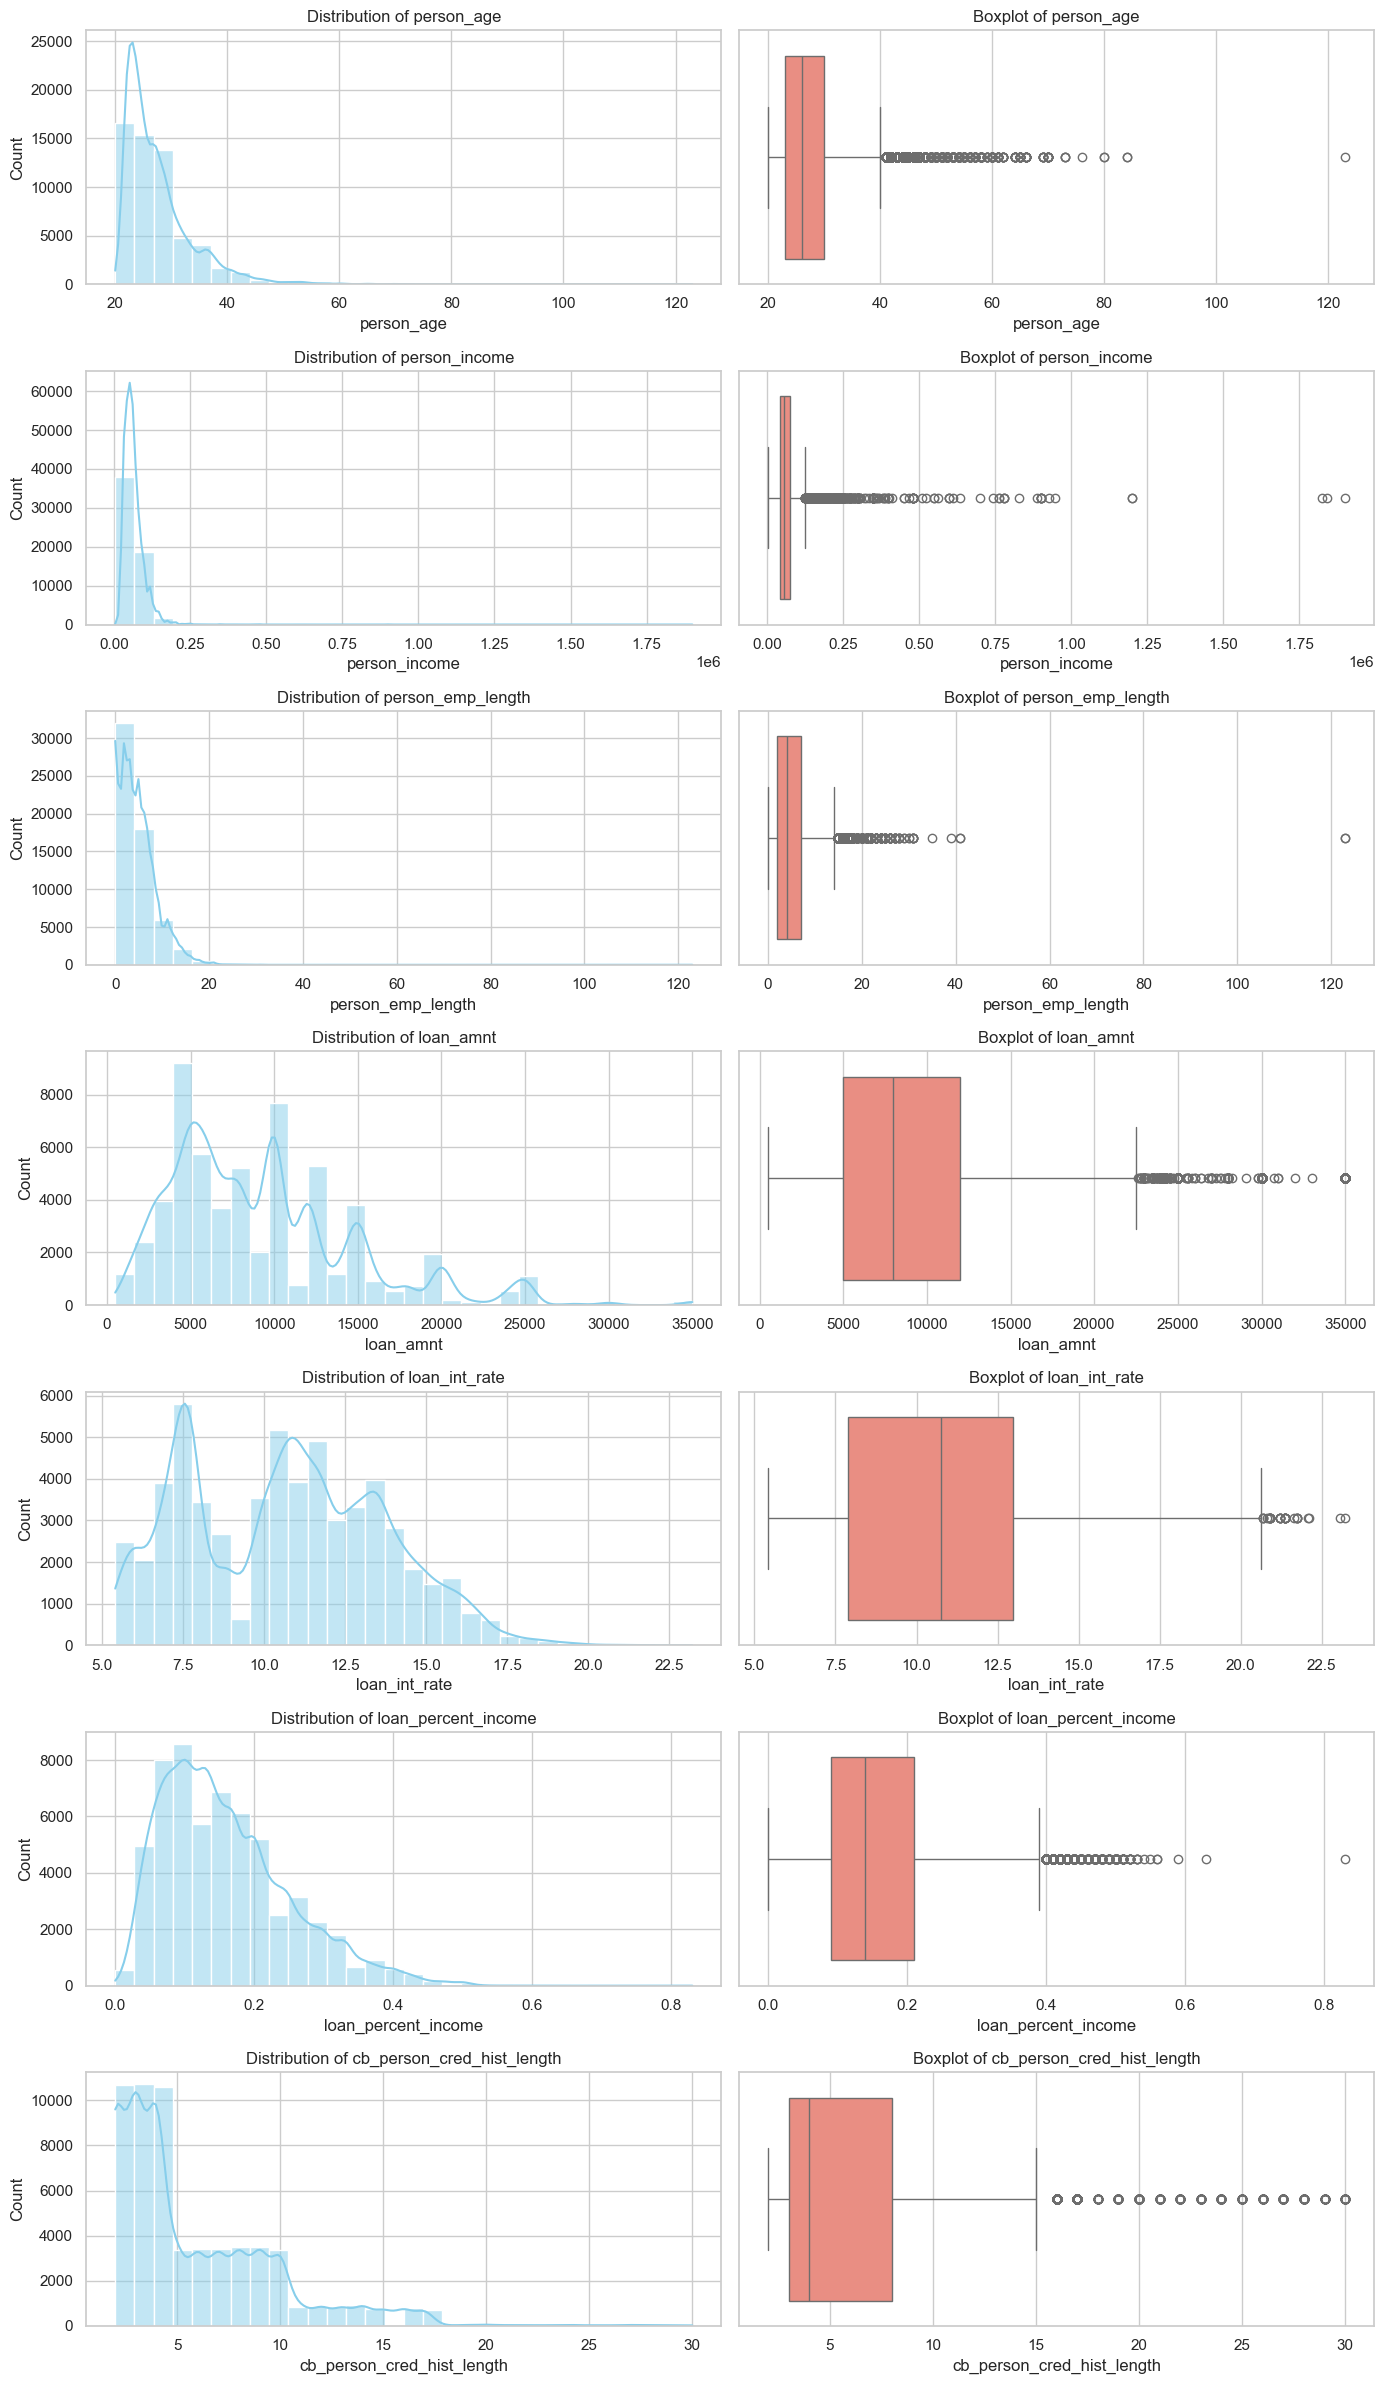

In [9]:
# Set plot styles
sns.set(style="whitegrid")

# Select numerical features for EDA and outlier detection
num_features = ['person_age', 'person_income', 'person_emp_length',
                'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                'cb_person_cred_hist_length']

# Plot distributions and boxplots to identify outliers
fig, axes = plt.subplots(len(num_features), 2, figsize=(14, 24))
for i, feature in enumerate(num_features):
    sns.histplot(df[feature], bins=30, ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f'Distribution of {feature}')
    
    sns.boxplot(x=df[feature], ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'Boxplot of {feature}')
    
plt.tight_layout()
plt.show()

## Distributions:

person_age, loan_amnt, and cb_person_cred_hist_length appear fairly reasonable.

person_income and loan_percent_income are skewed.

### Outliers are visible in person_income, loan_amnt, loan_int_rate, and loan_percent_income with extended tails or high-value spikes in boxplots.

In [10]:
# Capping Outliers 

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

outlier_cols = ['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']
for col in outlier_cols:
    df = cap_outliers(df, col)

Removed outliers using IQR method

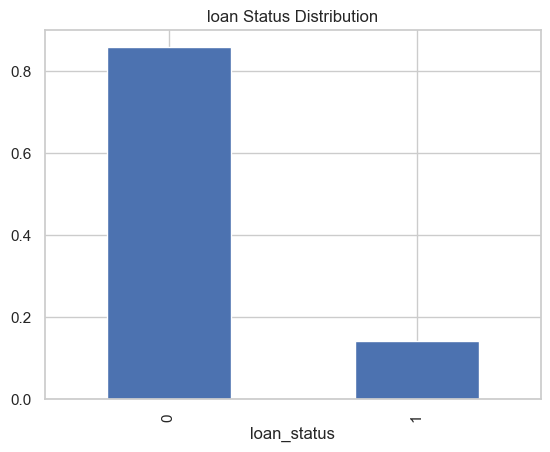

In [11]:
# Checking target variable distribution
df['loan_status'].value_counts()
df['loan_status'].value_counts(normalize=True).plot(kind='bar')
plt.title('loan Status Distribution')
plt.show()

The Target variable is imbalanced. We can use SMOTE to balance the data.

In [12]:
# Converting categorical Columns to numerical using Lable Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['loan_grade'] = le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])


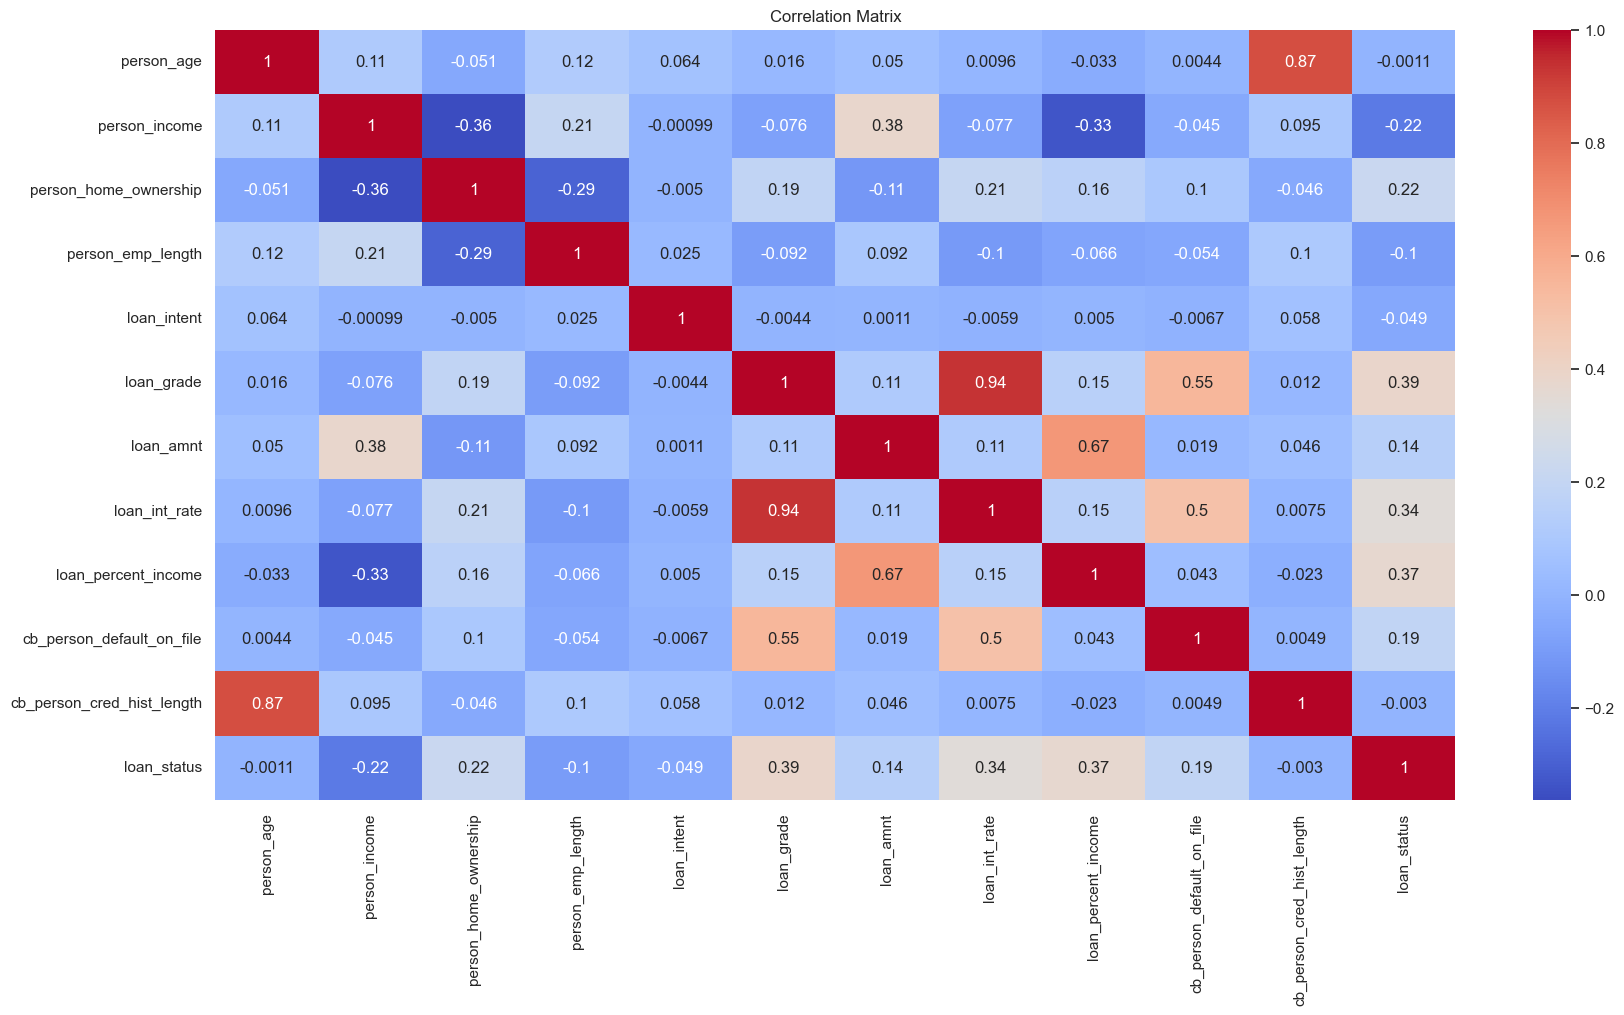

In [13]:
# correlations
corr_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Important features for predicting loan approval include loan_grade, loan_amnt, loan_int_rate,

In [14]:
# spltting Data in X and y
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [15]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
# Scaling The Data Using Minmax scaler
from sklearn.preprocessing import RobustScaler, StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Using Smote to handle imbalance data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Model Building And Evaluation

Accuracy: 0.9459474820961692
Confusion Matrix: [[14863   263]
 [  688  1780]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15126
           1       0.87      0.72      0.79      2468

    accuracy                           0.95     17594
   macro avg       0.91      0.85      0.88     17594
weighted avg       0.94      0.95      0.94     17594



<Axes: >

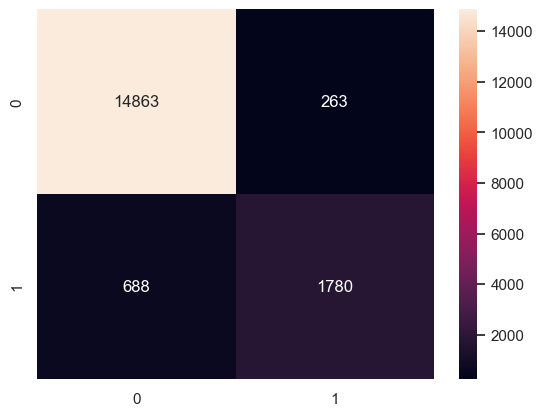

In [18]:
# Model Building 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
# Predicting on test data
y_pred = RF.predict(X_test)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

Cross-Validation Accuracy Scores: [0.96516918 0.96559568 0.96815468 0.96445835 0.96616434 0.96559568
 0.96559568 0.96858118 0.96416892 0.96402673]
Mean CV Accuracy: 0.9657510405977975

Test Set Evaluation:
Accuracy: 0.9456632943048766
Confusion Matrix:
 [[14864   262]
 [  694  1774]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     15126
           1       0.87      0.72      0.79      2468

    accuracy                           0.95     17594
   macro avg       0.91      0.85      0.88     17594
weighted avg       0.94      0.95      0.94     17594



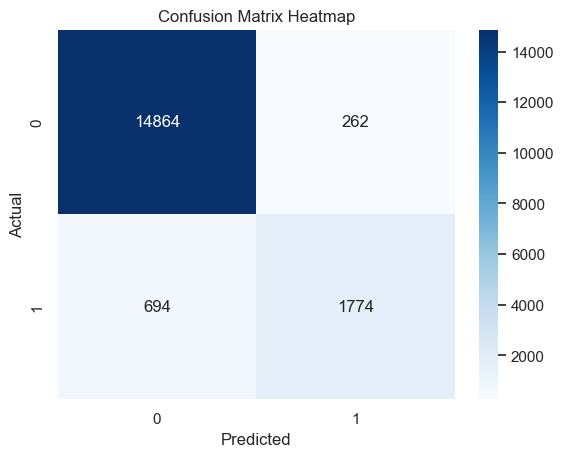

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize the classifier
RF = RandomForestClassifier()

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate using cross_val_score (accuracy for each fold)
cv_scores = cross_val_score(RF, X_train, y_train, cv=kf, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Train the model on the full training set
RF.fit(X_train, y_train)

# Predict on test data
y_pred = RF.predict(X_test)

# Evaluate on test data
print("\nTest Set Evaluation:")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(RF, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='accuracy',
                                   random_state=42, n_jobs=-1, verbose=2)

random_search.fit(X_train, y_train)

print("Best Parameters:\n", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=171; total time=  33.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=171; total time=  34.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=171; total time=  34.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=171; total time=  34.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=171; total time=  37.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=314; total time= 1.1min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],              # number of trees
    'max_depth': [None, 10, 20, 30],              # maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                # minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None],       # number of features considered at each split
    'bootstrap': [True, False]                    # whether bootstrap samples are used
}

# Initialize the classifier
RF = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:\n", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  35.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estim

KeyboardInterrupt: 

In [ ]:
# XgBoost Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))  
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')